¡Hola Juan! Como te va?

Mi nombre es Facundo Lozano! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

## 1. Introduction

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Juan, siempre me tomo este tiempo al inicio de tu proyecto para comentarte mis apreciaciones generales de esta iteración de tu entrega. 

Me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programador ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser un gran Data Scientist"

Ahora si yendo a esta notebook. Juan lo he dicho al final del proyecto y lo recalco aquí, has hecho un trabajo increible y se ha notado tu gran compromiso en todo momento, se nota tu gran capacidad de manejo sobre las herramientas y de comprensión de lo obtenido, cumpliste con todos los puntos que se debían implementar por lo que tu trabajo esta en condiciones de ser aprobado!

Exitos dentro de tu camino en el mundo de los datos Juan, saludos!

A mobile company named Megaline has notice many of its customers have legacy plans and wants to develope a model which can recommend those customers one of the newer plans: Smart or Ultra. We have been given a dataset with the information of the behaviour of customers who already changed to one of the newer plans and have been told to develope a model which can predict the best fitting plan with an accuracy score of minimum 0.75.

## 2. Reading the data

In this section, we will evaluate the quality of our information. This implies reading it, check for any error or information which needs to be processed and make the corrections needed in case is needed.

### 2.1. Importing libraries

The following code represents the libraries/modules we will use to work with our data and test different learning algorithms and create the appropiate models.

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

### 2.2. Importing the dataset

Importing the dataset to start working with it. We will name it `data`.

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')

### 2.3. Reading the data

The following code uses the functions `info()` & `describe()` to show the general information of our dataset `data`. We can see we have 3214 rows and none of them have apparent missing values. The columns of the dataset are the following:

 * `calls`: The number of calls made by the customer.
 * `minutes`: Total of calls duration (in minutes).
 * `messages`: Total of messages sent by the customer.
 * `mb_used`: Internet data used by customer (in MBs).
 * `is_ultra`: Mobile plan the customer had on the specific moth (0 for Smart, 1 for Ultra).
 
All 5 columns have appropiate data types; columns `calls, minutes, messages & mb_used` represent numeric values for a determined variable, but only columns `minutes` & `mb_used` can vary on an infinitesimal way. Because of this, let's convert columns `calls` & `messages` to an int data type (as we can only have integer values of calls and messages). In case of column `is_ultra`, we have decided to leave its data type as int, because even though it can be represented as a category or boolean data type values, as long as we are using numbers (0 and 1) let's try to keep the original data type for those values.

We do not consider necessary delete duplicated rows, because we do not have a reason to conclude duplicated rows represents the same user_id (this is because we do not have a value we can link our data with customers). Because of this, we will not apply a 'drop_duplicates' process.

In [3]:
print(data.info())
print()
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None

             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.000000   571.927500    57.000000  21424.700000 

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
Excelente implementación de importaciones y carga de datos. Felicitaciones por mantener los procesos en celdas separadas! A la vez excelente implementación de los métodos para observar la composición de los datos!

### 2.4 Change data types for columns calls and messages

Let's evaluate if data will not be lost if converting these columns to an 'int' data type, and if not convert them.

In [4]:
if np.array_equal(data['calls'], data['calls'].astype('int')):
    data['calls'] = data['calls'].astype('int')
    
if np.array_equal(data['messages'], data['messages'].astype('int')):
    data['messages'] = data['messages'].astype('int')

Double checking our information we can see both columns did not have data loss on the convertion and were converted correctly to an int64 data type.

In [5]:
print(data.info())
print()
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 125.7 KB
None

             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.000000   571.927500    57.000000  21424.700000 

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
Implementaciones perfectas para normalizar los tipos de valores que contienen algunas de nuestras features! Bien hecho!

## 3. Generating the train, test and validation sets

To make possible the training of our models, we first need to define the information we need to predict and the parameters we will use to make the prediction possible, which we will be calling `target` and `features` respectively. Once we have that information divided, we need to segment that information in 3 sets of data for all the machine learning process: `training process`, `test process` and `validation process`.

Let's work the data to get all the mentioned above.

### 3.1. Defining features and target

The information we were asked to predict was "the best fitting new mobile plan available", which is defined on the column `is_ultra` (if 0 the plan is Smart, but if 1 the plan is Ultra). This is our target.

On the other hand, the information we will use to make the prediction are all the other columns of the dataset. Those are our features.

In [6]:
# Features will be all columns in our dataset except 'is_ultra'
features = data.drop(['is_ultra'], axis=1)

# Our target will be column 'is_ultra'
target = data['is_ultra']

### 3.2. Getting training features and target

Dividing the total information from features and target with a size of 0.7 for the variable `train_size`, we obtain the following variables:

 * `features_train, target_train`: Sets for the training process.
 * `features_comb, target_comb`: Sets wit the information for the test and validation process.

In [7]:
features_train, features_comb, target_train, target_comb = train_test_split(features, target, test_size=0.3, train_size=0.7)

### 3.3. Getting features and targets for the test and validation sets

Using the 'combined' sets of the code block above, we can divide with the variables test_size=0.33 and train_size=0.67 to get a validation tuple of sets of 20% of the total data aprox. and a test tuple of sets of 10% of the total data aprox.

In [8]:
features_val, features_test, target_val, target_test = train_test_split(features_comb, target_comb, test_size=0.33, train_size=0.67)

We got the following tuples:

 * Training set (70%)
     - `features_train, target_train`
 * Validation set (20% aprox)
     - `features_test, target_test`
 * Test set (10% aprox)
     - `features_val, target_val`
     
With the information divided in this way we can continue with the next step: `evaluate different learning algorithms` and `select` the best one for this application.

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
Perfecto Juan, aquí hemos realizado la implementación perfecta sobre la división de los datos en los 3 conjuntos, tal como debíamos.

## 4. Testing algorithms

The information we need to predict is `categorical`. We know this because we can only have a limited amount of different values for it (0 or 1). Knowing this, we shall use `categorical learning algorithms` to train our future model. At this moment, we only know 3 different algorithms:

 * `Decision Tree Classifier`
 * `Random Forest Classifier`
 * `Logistic Regression`
 
Each of them have their advantages and disvantages. Let's use them and decide which of them gives us the best accuracy. `Our goal score is 0.75` and `our random state is 12345`.

### 4.1. Decision Tree Classifier

A Decision Tree Classifier (DTC) model trains a decision tree with the training data is given. This model is quite sensitive to overfitting and underfitting, but gives relative fast processing time.

Let's create a function which can iterate thru some of the model hyperparameters and choose the best combination of hyperparameters for this application.

In [9]:
def dtc_Chooser(training_features, training_target, validation_features, validation_target, in_split=2, in_leaf=1, in_depth=None):
    
    """
    This function takes as inputs 2 sets of data (the validation and the training sets), and gets the accuracy score
    for the information on those sets using a Decision Tree Classifier model. You can also specify a new value 
    for the following parameters:
    
    min_samples_split, min_samples_leaf & max_depth.
    
    to iterate over them in the model if you want to use values different from the default parameters.
    
    Inputs:
    -training_features: DataFrame or Series
        ~ The feature(s) values for the training set.
    -training_target: DataFrame or Series
        ~ The target(s) values for the training set.
    -validation_features: DataFrame or Series
        ~ The feature(s) values for the validation set.
    -validation_target: DataFrame or Series
        ~ The target(s) values for the validation set.
    -in_split: int or float
        ~ Maximum value for the min_samples_split parameter.
    -in_leaf: int or float
        ~ Maximum value for the min_samples_leaf parameter.
    -in_depth: None or int
        ~ Maximum value for the max_depth parameter.
        
    Outputs:
    -best_split_dtc: int or float
        ~ The most optimal value for the min_samples_split parameter.
    -best_leaf_dtc: int or float
        ~ The most optimal value for the min_samples_leaf parameter.
    -best_depth_dtc: None or int
        ~ The most optimal value for the max_depth parameter.
    -best_result_dtc: float
        ~ The best accuracy level obtained in the iteration.
    """
    
    # Evaluations for incorrect inputs
    if len(training_features) != len(training_target):
        return "Error. Training sets do not have the same lenght."
        
    if len(validation_features) != len(validation_target):
        return "Error. Test sets do not have the same lenght."
        
    if in_split < 0:
        return "Error. Minimum samples split value is less than 0."
        
    if in_leaf < 0:
        return "Error. Minimum samples leaf value is less than 0."
        
    if in_depth % 1 != 0:
        return "Error. Max depth value is a float number."
    
    if in_depth < 0:
        return "Error. Max depth value is less than 0."
    
    # Local variables for the parameters for the best accuracy in the evaluation
    best_result_dtc = 0.0
    best_split_dtc = 0.0
    best_leaf_dtc = 0.0
    best_depth_dtc = 0.0
    best_result1_dtc = 0.0
    
    # Getting the value for min_samples_split variable in case our input is a float number between 0 and 1
    if in_split % 1 != 0:
        
        in_split = math.ceil(len(target_train) * in_split)
        
    # Getting the value for min_samples_leaf variable in case our input is a float number between 0 and 1
    if in_leaf % 1 != 0:
        
        in_leaf = math.ceil(len(target_train) * in_leaf)

        
    
    # Evaluating the model for min_samples_split between 2 and the input value (increments by 1)
    for split in range(2, (in_split+1), 1):

        # Evaluating the model for min_samples_leaf between 1 and the input value (increments by 1)
        for leaf in range(1, (in_leaf+1), 1):

            # Evaluating if out input value for the max_depth variable is not None
            if in_depth != None:
                
                # Evaluating the model for max_depth between 1 and the input value (increments by 1)
                for depth in range(1, (in_depth+1), 1):

                    # Setting the model with our hyperparameters
                    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)

                    # Training the model with the training sets
                    model_dtc.fit(training_features, training_target)

                    # Obtaining the predictions using test set features
                    predictions = model_dtc.predict(validation_features)

                    # Obtaining the accuracy of the model for each configuration (usinf both accuracy_score and score functions)
                    result = accuracy_score(validation_target, predictions)
                    result1 = model_dtc.score(validation_features, validation_target)

                    # In case the accuracy of the current configuration is greater than the current "best configuration",
                    # save the current configuration as the "best configuration"
                    if result > best_result_dtc:
                        best_result_dtc = result
                        best_split_dtc = split
                        best_leaf_dtc = leaf
                        best_depth_dtc = depth
                        best_result1_dtc = result1
                        
            # In case we select None as the value for max_depth
            else:
                
                # Setting the model with our hyperparameters
                model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=None, min_samples_split=split, min_samples_leaf=leaf)

                # Training the model with the training sets
                model_dtc.fit(training_features, training_target)

                # Obtaining the predictions using test set features
                predictions = model_dtc.predict(validation_features)

                # Obtaining the accuracy of the model for each configuration (usinf both accuracy_score and score functions)
                result = accuracy_score(validation_target, predictions)
                result1 = model_dtc.score(validation_features, validation_target)

                # In case the accuracy of the current configuration is greater than the current "best configuration",
                # save the current configuration as the "best configuration"
                if result > best_result_dtc:
                    best_result_dtc = result
                    best_split_dtc = split
                    best_leaf_dtc = leaf
                    best_depth_dtc = in_depth
                    best_result1_dtc = result1
                
    # Once finished the iterations, print the best configuration hyperparameters with its accuracy scores
    print(f"""The best configuration with a result of '{best_result_dtc} / {best_result1_dtc}' is: 
              split ({best_split_dtc}), leaf ({best_leaf_dtc}), depth ({best_depth_dtc}).'""")
    
    # Returning values of the best hyperparameters configuration in case we want to use them in the future
    return best_split_dtc, best_leaf_dtc, best_depth_dtc, best_result_dtc

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
¡Felicidades por esta función Juan! Has implementado varios métodos clave para entrenar y evaluar tu modelo. Has utilizado el método fit para entrenar el modelo, el método predict para obtener predicciones, y has evaluado la precisión del modelo utilizando accuracy_score y score tal como correspondía. Además, has implementado una lógica para guardar la configuración de hiperparámetros que proporciona el mejor rendimiento. Esto demuestra un buen entendimiento de los pasos necesarios para construir y optimizar un modelo, muy bien hecho! 

Once done, is time to test the function.

Let's use as inputs the training sets, the validation sets, a split range from 2-5, a leaf range from 1-5 and a depth range from 1-10.

In [10]:
dtc_split, dtc_leaf, dtc_depth, dtc_result = dtc_Chooser(features_train, target_train, features_val, target_val, in_split=5, in_leaf=5, in_depth=10)

The best configuration with a result of '0.8126934984520123 / 0.8126934984520123' is: 
              split (2), leaf (5), depth (10).'


With this, we have the new variables dtc_split, dtc_leaf, dtc_depth, dtc_result to compare and work with in further sections of the project.

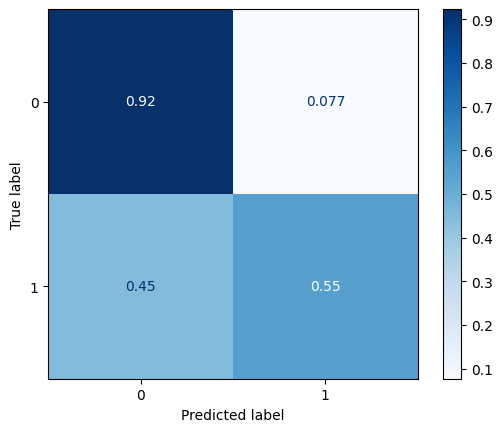

In [11]:
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=dtc_depth, min_samples_split=dtc_split, min_samples_leaf=dtc_leaf)
model_dtc.fit(features_train, target_train)

plot_confusion_matrix(estimator=model_dtc, X=features_val, y_true=target_val,
                      normalize='true', cmap='Blues')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

Excelente obtención de la matriz de confusión!

Using those variables we can create a "confusion matrix plot" in which we can conclude the following:

 * Our model can `predict as 0 the 92%` of the total values which are 0 of the set.
 * Our model can `predict as 1 the 55%` of the total values which are 1 of the set.

### 4.2. Random Forest Classifier

The Random Forest Classifier (RFC) has its base on the Decision Tree Classifier (DTC), because this new model uses a new hyperparameter `n_estimators`, which is basically the number of DTC models it will be using on its model. For this reason this model is not sensitive to overfitting and underfitting, but its processing time is increased drastically depending on the number of estimators used.

Similar to the DTC, let's create a function which can iterate over the RFC hyperparameters and find the best fitting configuration for the application.

In [12]:
def rfc_Chooser(training_features, training_target, validation_features, validation_target, in_estimators=100, in_split=2, in_leaf=1, in_depth=None):
    
    """
    This function takes as inputs 2 sets of data (the validation and the training sets), and gets the accuracy score
    for the information on those sets using a Random Forest Classifier model. You can also specify a new value 
    for the following parameters:
    
    n_estimators, min_samples_split, min_samples_leaf & max_depth.
    
    to iterate over them in the model if you want to use values different from the default parameters.
    
    Inputs:
    -training_features: DataFrame or Series
        ~ The feature(s) values for the training set.
    -training_target: DataFrame or Series
        ~ The target(s) values for the training set.
    -validation_features: DataFrame or Series
        ~ The feature(s) values for the validation set.
    -validation_target: DataFrame or Series
        ~ The target(s) values for the validation set.
    -in_estimators: int
        ~ Maximum value for the n_estimators parameter.
    -in_split: int or float
        ~ Maximum value for the min_samples_split parameter.
    -in_leaf: int or float
        ~ Maximum value for the min_samples_leaf parameter.
    -in_depth: None or int
        ~ Maximum value for the max_depth parameter.
        
    Outputs:
    -best_split_rfc: int or float
        ~ The most optimal value for the min_samples_split parameter.
    -best_leaf_rfc: int or float
        ~ The most optimal value for the min_samples_leaf parameter.
    -best_depth_rfc: None or int
        ~ The most optimal value for the max_depth parameter.
    -best_est_rfc: int
        ~ The most optimal value for the max_depth parameter.
    -best_result_rfc: float
        ~ The best accuracy level obtained in the iteration.
    """
    
    # Evaluations for incorrect inputs
    if len(training_features) != len(training_target):
        return "Error. Training sets do not have the same lenght."
        
    if len(validation_features) != len(validation_target):
        return "Error. Test sets do not have the same lenght."
    
    if in_estimators < 1:
        return "Error. Number of estimators value is less than 1."
    
    if in_estimators % 1 != 0:
        return "Error. Number of estimators value is less than 0."
        
    if in_split < 0:
        return "Error. Minimum samples split value is less than 0."
        
    if in_leaf < 0:
        return "Error. Minimum samples leaf value is less than 0."
        
    if in_depth % 1 != 0:
        return "Error. Max depth value is a float number."
    
    if in_depth < 0:
        return "Error. Max depth value is less than 0."
    
    # Local variables for the parameters for the best accuracy in the evaluation
    best_result_rfc = 0.0
    best_split_rfc = 0.0
    best_leaf_rfc = 0.0
    best_depth_rfc = 0.0
    best_est_rfc = 0.0
    best_result1_rfc = 0.0
    
    # Getting the value for min_samples_split variable in case our input is a float number between 0 and 1
    if in_split % 1 != 0:
        
        in_split = math.ceil(len(target_train) * in_split)
        
    # Getting the value for min_samples_leaf variable in case our input is a float number between 0 and 1
    if in_leaf % 1 != 0:
        
        in_leaf = math.ceil(len(target_train) * in_leaf)

    # Evaluating the model for min_samples_split between 2 and the input value (increments by 1)
    for split in range(2, (in_split+1), 1):

        # Evaluating the model for min_samples_leaf between 1 and the input value (increments by 1)
        for leaf in range(1, (in_leaf+1), 1):
            
            # Evaluating the model for n_estimators between 10 and the input value (increments by 10)
            for est in range(10, (in_estimators+1), 10):

                # Evaluating if out input value for the max_depth variable is not None
                if in_depth != None:

                    # Evaluating the model for max_depth between 1 and the input value (increments by 1)
                    for depth in range(1, (in_depth+1), 1):

                        # Setting the model with our hyperparameters
                        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)

                        # Training the model with the training sets
                        model_rfc.fit(training_features, training_target)

                        # Obtaining the predictions using test set features
                        predictions = model_rfc.predict(validation_features)

                        # Obtaining the accuracy of the model for each configuration (usinf both accuracy_score and score functions)
                        result = accuracy_score(validation_target, predictions)
                        result1 = model_rfc.score(validation_features, validation_target) 

                        # In case the accuracy of the current configuration is greater than the current "best configuration",
                        # save the current configuration as the "best configuration"
                        if result > best_result_rfc:
                            best_result_rfc = result
                            best_split_rfc = split
                            best_leaf_rfc = leaf
                            best_depth_rfc = depth
                            best_est_rfc = est
                            best_result1_rfc = result1
                            
                # In case we select None as the value for max_depth
                else:

                    # Setting the model with our hyperparameters
                    model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=None, min_samples_split=split, min_samples_leaf=leaf)

                    # Training the model with the training sets
                    model_rfc.fit(training_features, training_target)

                    # Obtaining the predictions using test set features
                    predictions = model_rfc.predict(validation_features)

                    # Obtaining the accuracy of the model for each configuration (usinf both accuracy_score and score functions)
                    result = accuracy_score(validation_target, predictions)
                    result1 = model_rfc.score(validation_features, validation_target) 

                    # In case the accuracy of the current configuration is greater than the current "best configuration",
                    # save the current configuration as the "best configuration"
                    if result > best_result_rfc:
                        best_result_rfc = result
                        best_split_rfc = split
                        best_leaf_rfc = leaf
                        best_depth_rfc = in_depth
                        best_est_rfc = est
                        best_result1_rfc = result1
                
    # Once finished the iterations, print the best configuration hyperparameters with its accuracy scores
    print(f"""The best configuration with a result of '{best_result_rfc} / {best_result1_rfc}' is: 
              split ({best_split_rfc}), leaf ({best_leaf_rfc}), depth ({best_depth_rfc}), estimators ({best_est_rfc}).'""")
    
    # Returning values of the best hyperparameters configuration in case we want to use them in the future
    return best_split_rfc, best_leaf_rfc, best_depth_rfc, best_est_rfc, best_result_rfc

Once finished, let's test it.

We will be using the same hyperparameters as in the DTC model, but adding an estimators range from 10-100.

In [13]:
rfc_split, rfc_leaf, rfc_depth, rfc_est, rfc_result = rfc_Chooser(features_train, target_train, features_val, target_val, in_estimators=100, in_split=5, in_leaf=5, in_depth=10)

The best configuration with a result of '0.8235294117647058 / 0.8235294117647058' is: 
              split (5), leaf (2), depth (10), estimators (60).'


With this, we have the new variables rfc_split, rfc_leaf, rfc_depth, rfc_est, rfc_result to compare and work with in further sections of the project.

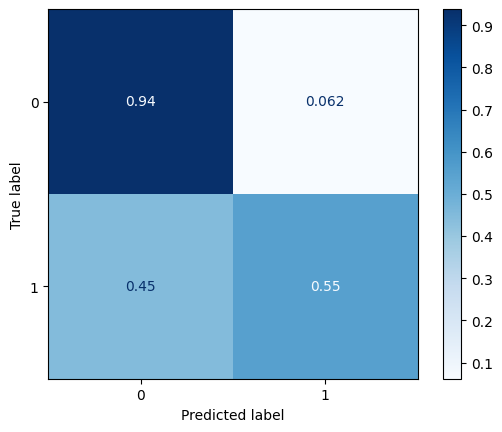

In [14]:
model_rfc = RandomForestClassifier(random_state=12345, max_depth=rfc_depth, min_samples_split=rfc_split, min_samples_leaf=rfc_leaf, n_estimators=rfc_est)
model_rfc.fit(features_train, target_train)

plot_confusion_matrix(estimator=model_rfc, X=features_val, y_true=target_val,
                      normalize='true', cmap='Blues')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

Aqui un proceso similar y correcto pero sobre un modelo diferente, nuevamente felicitaciones Juan!

Similar as in the DecisionTreeClassifier model, we can create a new confusion matrix plot for the RandomForestClassifier model in which we can conclude the following:

 * Our model can `predict as 0 the 94%` of the total values which are 0 of the set.
 * Our model can `predict as 1 the 55%` of the total values which are 1 of the set.

### 4.3. Logistic Regression

The Logistic Regression (LR) model has its base on the sigmoid function (s-shaped curve). This mean it measures the probability of a value to be True or False (or in our case to be 0 or 1). This model has a fast procesing time but does not have high levels of accuracy, so there will be occasions this model is not the most fitting model available.

As in the past models, let's create a function in which we can work with this model.

In [15]:
def lr_Chooser(training_features, training_target, validation_features, validation_target, in_solver='liblinear'):
    
    """
    This function takes as inputs 2 sets of data (the validation and the test sets), and gets the accuracy score
    for the information on those sets using a Logistic Regression model. You can also specify a new value for the 
    parameter 'solver' to change the model processing if you want to use values different from the default parameters.
    
    Inputs:
    -training_features: DataFrame or Series
        ~ The feature(s) values for the training set.
    -training_target: DataFrame or Series
        ~ The target(s) values for the training set.
    -validation_features: DataFrame or Series
        ~ The feature(s) values for the validation set.
    -validation_target: DataFrame or Series
        ~ The target(s) values for the validation set.
    -in_solver: str
        ~ Value for the 'solver' parameter.
        
    Outputs:
    -in_solver: str
        ~ The value selected for the 'solver' parameter.
    -result: float
        ~ The accuracy score value obtained.
    """
    
    # Setting the model with the selected solver input
    model_lr = LogisticRegression(random_state=12345, solver=in_solver)
    
    # Training the model
    model_lr.fit(features_train, target_train)
    
    # Generating the predictions
    predictions = model_lr.predict(validation_features)
    
    # Obtaining the accuracy of the model for each configuration (usinf both accuracy_score and score functions)
    result = accuracy_score(validation_target, predictions)
    result1 = model_lr.score(validation_features, validation_target)
    
    # Once finished, print its accuracy scores
    print(f"The result for linear regression model is: {result} / {result1}")
    
    # Returning the accuracy score obtained and the solver selected
    return in_solver, result

Once finished, let's test it with it's default `solver` value `liblinear`.

In [33]:
lr_solver, lr_result = lr_Chooser(features_train, target_train, features_val, target_val)

The result for linear regression model is: 0.7523219814241486 / 0.7523219814241486


With this, we have the new variables lr_solver, lr_result to compare and work with in further sections of the project.

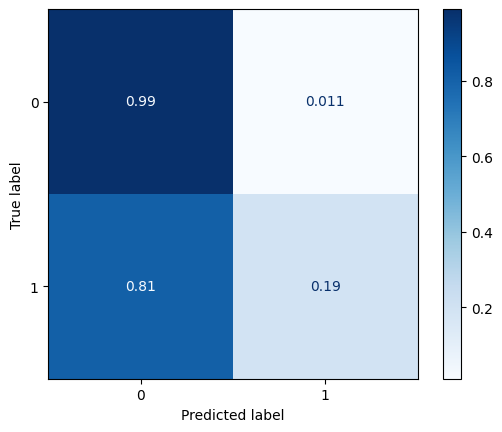

In [34]:
model_lr = LogisticRegression(random_state=12345, solver=lr_solver)
model_lr.fit(features_train, target_train)

plot_confusion_matrix(estimator=model_lr, X=features_val, y_true=target_val,
                      normalize='true', cmap='Blues')
plt.show()

Creating a new confusion matrix plot for the LogisticRegression model we can conclude the following:

 * Our model can `predict as 0 the 99%` of the total values which are 0 of the set.
 * Our model can `predict as 1 the 1.9%` of the total values which are 1 of the set.

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

Un modelo más tradicional pero util, excelente Juan!

### 4.4. Determine which model gives us the higher accuracy score

At this point, we have enough information to determine which model is the best for this application. So let's generate the final model using the code below which will evaluate the higher accuracy score among the 3 models and generate it using the best hyperparameters obtained.

In [18]:
# If-else statement to evaluate which accuracy score value from the 3 models used is higher. Depending of which is determined
# to be higher, create a 'final_model' with the corresponding algorithm and its best hyperparameters obtained.
if dtc_result > rfc_result:
    
    if dtc_result > lr_result:
        
        model_final = DecisionTreeClassifier(random_state=12345, max_depth=dtc_depth, min_samples_split=dtc_split, min_samples_leaf=dtc_leaf)
        
    else:
        
        model_final = LogisticRegression(random_state=12345, solver=lr_solver)
        
else:
    
    if rfc_result > lr_result:
        
        model_final = RandomForestClassifier(random_state=12345, n_estimators=rfc_est, max_depth=rfc_depth, min_samples_split=rfc_split, min_samples_leaf=rfc_leaf)
        
    else:
        
        model_final = LogisticRegression(random_state=12345, solver=lr_solver)

Applying a new confusion matrix plot (seen below) for the best model obtained we can conclude the following:

 * Our model can `predict as 0 the 88%` of the total values which are 0 of the set.
 * Our model can `predict as 1 the 58%` of the total values which are 1 of the set.

In [21]:
model_final.fit(features_val, target_val)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=60, random_state=12345)

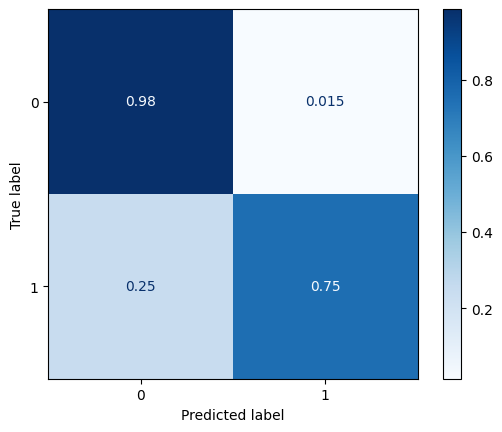

In [22]:
plot_confusion_matrix(estimator=model_final, X=features_val, y_true=target_val,
                      normalize='true', cmap='Blues')
plt.show()

Once this is complete, we can see the RFC model (Random Forest Classifier) is the one with the highest accuracy score. We can now use this new model with the validation set and obtain the accuracy level for this configuration.

In [23]:
model_final.fit(features_test, target_test)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=60, random_state=12345)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

Una logica perfecta para definir cual fue nuestro mejor modelo para así elegirlo y utilizarlo. Has hecho un grandisimo trabajo Juan!

### 4.5. Conclusions

As we could see, the best model overall was the RandomForestClassifier, seconds DecisionTreeClassifier and lastly the LinearRegression model. Despite this, it's undeniable the RFC needs more processing time than the other options, so we need to be cautious when we intend to apply it on our models and analyze if other options are better overall.

Also, we could see by the confusion matrix plots despite the DTC and RFC matrices are quite similar, once we see the LinearRegression model matrix we can see a drastical difference in the results (indicating we should not use that algorithm).

Overall, even though we cannot generalize an algorith usage over the others, we must analyze the best model through various strategies (the iteration strategy we used in this project is only one of them) and then adjust it to improve its results.

## 5. Using Random Forest Classifier with test sets

On past section we determined the RandomForestClassifier is the best model for the current application, so now we can use the test sets to determine our new accuracy score with the best hyperparameters configuration we got.

To compare how the values change increasing the quantity of data we will get the score for the test sets and the score for the whole dataset features and target. We can see the values differ drastically among themselves, maybe implying an underfitting, but if this is the case we would need much more processing time for a minimal increase in the scores (currently we have almost 80% of accuracy (said other way, we find the correct answer 4 of each 5 customers), so maybe this would be enough).

In [24]:
results = model_final.score(features_test, target_test)
results_data = model_final.score(features, target)

In [25]:
print(f"Results with best fitting model using validation sets is: {results}")

Results with best fitting model using validation sets is: 0.9498432601880877


In [26]:
print(f"Results with best fitting model using the complete dataset is: {results_data}")

Results with best fitting model using the complete dataset is: 0.7937149968886124


Applying a confusion matrix to the test sets, we can see the following:

 * Our model can `predict as 0 the 99%` of the total values which are 0 of the set.
 * Our model can `predict as 1 the 87%` of the total values which are 1 of the set.

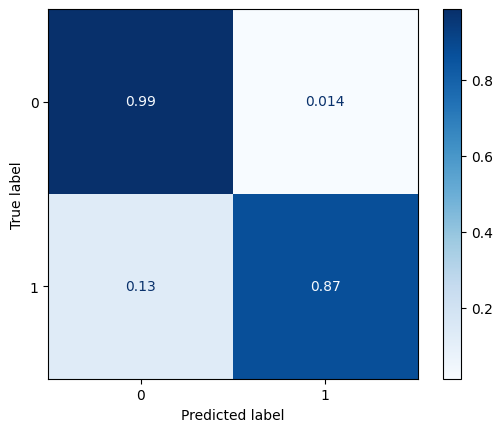

In [27]:
plot_confusion_matrix(estimator=model_final, X=features_test, y_true=target_test,
                      normalize='true', cmap='Blues')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

Excelente! Tal como se debía hemos elegido el mejor modelo y lo hemos testeado contra nuestro conjunto de pruebas, muy buena imlementación!

## 6. Sanity test

A sanity test is a basic test to quickly evaluate whether a claim or the result of a calculation can possibly be true. In our case we will evaluate this using a DummyClassifier algorithm, set the strategy as "prior" (as this is the best strategy for this application as we could determine) and see if our model is better that the "causality".

In [28]:
model_sanity = DummyClassifier(random_state=12345, strategy='prior')

In [29]:
model_sanity.fit(features_test, target_test)

DummyClassifier(random_state=12345)

In [30]:
results_sanity = model_sanity.score(features_test, target_test)

In [31]:
print(f"Results with best sanity test model using validation sets is: {results_sanity}.")

Results with best sanity test model using validation sets is: 0.6865203761755486.


We get by the DummyClassifier model our accuracy score is less than the 70% (worse than we got from the RFC model), so we can use this as an indicative to conclude our model is better than the "causality". Nevertheless, let's visualize in a confusion matrix how the information of this sanity test behaves and complement our information with new information.

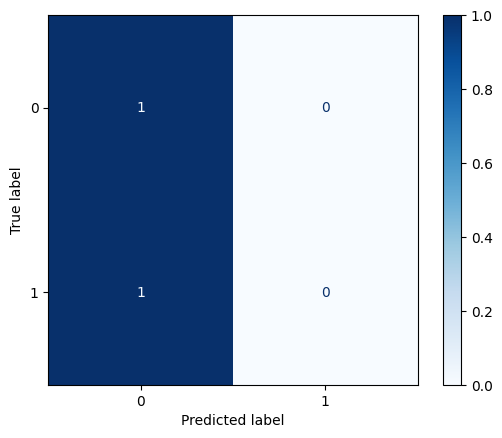

In [32]:
plot_confusion_matrix(estimator=model_sanity, X=features_test, y_true=target_test,
                      normalize='true', cmap='Blues')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
Excelentes pruebas de cordura Juan, estas son muy importantes ya que nos permiten corroborar que nuestro modelo se comporta mejor que una opción básica confirmandonos que vale la pena utilizarlo. Excelente!

Using the parameter strategy as "prior" we can see the model sets all the predicted values as 0, which is not what should be happening as we are losing valuable predictions for our customers.

### 6.1. Conclusion

Comparing our accuracy scores for the sanity test and our configured model we can see our model has better accuracy score and our predictions are more accurate than the sanity test. By this way, we can conclude our model has passed the sanity test.

## 7. General conclusions

Through this project we could train classifier models to predict the best plan for Megaline customers from a list of two plans: Smart and Ultra. With this in mind we trained 3 different algorithms ans iterate over their hyperparamenters to obtain the best configuration to get the higher accuracy score possible and then to train the model which gave us the highest accuracy score.

We needed to consider either the accuracy score obtained and the processing time and concluded the Random Forest Classifier was our best option. Setting its hyperparameters we obtained a high enough accuracy score and test it with the test sets.

Lastly we applied a sanity test to prove our information was being predicted as intended and not being generated randomly. Using a Dummy Classifier model we could prove our data was not being generated unbiased and determined the sanity test was passed.

Final conclusions for this project are:

 * Test various models to see how the information is being handled from different strategies and then select the one who fits the application better.
 * Verify always the data you are obtaining from your models are supposed to be the way you are obtaining them.

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

Quería felicitarte Juan porque has tenido un gran compromiso con tus conclusiones y con tus códigos a lo largo de todo el trabajo, el trabajo en si está excelente, nuevamente felicitaciones!